## Health Study

We validated the dataset structure (dimensions, column names, data types) and checked for missing values. \
No missing values were detected and the categorical variables (sex, smoker, disease) contain expected categories only.\
Therefore, no cleaning or imputation is required and we proceed with the original DataFrame.
To ensure reproducibility, we set a fixed random seed and use a consistent execution environment.\
All results in this notebook can be reproduced by running the notebook from top to bottom

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

# Make plots show up in the notebook
# %matplotlib inline

DATA_PATH = "../data/health_study_dataset.csv"  # because notebook is in notebooks/
df = pd.read_csv(DATA_PATH)

df.head()


,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0
2,3,59,F,169.9,82.2,151.7,6.16,No,0
3,4,72,M,157.7,93.1,151.0,6.63,No,0
4,5,46,M,192.6,104.1,144.1,5.21,No,0


We confirm that the dataset loaded correctly by checking its dimensions (rows and columns).

In [13]:
print(f"Rows: {df.shape[0]} \nColumns: {df.shape[1]}")

Rows: 800 
Columns: 9


We verify that all expected variables are present and correctly named. This ensures that subsequent analysis steps (statistics, plots, and hypothesis tests) reference valid columns.

In [26]:
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'systolic_bp', 'cholesterol',
       'smoker', 'disease'],
      dtype='object')

All variables have the expected data types and contain no missing values. Therefore, no type conversions or data cleaning steps are required before analysis.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           800 non-null    int64  
 1   age          800 non-null    int64  
 2   sex          800 non-null    object 
 3   height       800 non-null    float64
 4   weight       800 non-null    float64
 5   systolic_bp  800 non-null    float64
 6   cholesterol  800 non-null    float64
 7   smoker       800 non-null    object 
 8   disease      800 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 56.4+ KB


No missing values were detected in any column. As a result, no imputation or row removal is required, and the analysis proceeds using the original dataset.

In [27]:
df.isna().sum()


id             0
age            0
sex            0
height         0
weight         0
systolic_bp    0
cholesterol    0
smoker         0
disease        0
dtype: int64

All categorical variables contain only expected values. No unexpected categories or missing encodings were observed. Therefore, the dataset is suitable for grouped analysis by sex and smoking status.

In [ ]:
df["sex"].value_counts(dropna=False)

disease
0    753
1     47
Name: count, dtype: int64

In [ ]:
df["smoker"].value_counts(dropna=False)

smoker
No     587
Yes    213
Name: count, dtype: int64

In [ ]:
df["disease"].value_counts(dropna=False)

disease
0    753
1     47
Name: count, dtype: int64

The summary statistics show plausible ranges for all variables. Ages and anthropometric measures fall within expected human limits, and systolic blood pressure values are consistent with a general adult population. No extreme or implausible values were detected.

In [ ]:
columns = ["age", "weight", "height", "systolic_bp", "cholesterol"]

summary_stats = {}

for col in columns:
    summary_stats[col] = {
        "mean": df[col].mean(),
        "median": df[col].median(),
        "min": df[col].min(),
        "max": df[col].max()
    }

pd.DataFrame(summary_stats)


,age,weight,height,systolic_bp,cholesterol
mean,49.42625,73.413,171.84925,149.178625,4.92915
median,50.00000,73.200,171.35000,149.400000,4.97000
min,18.00000,33.700,144.40000,106.800000,2.50000
max,90.00000,114.400,200.40000,185.900000,7.88000


In [34]:
df[columns].describe()

,age,weight,height,systolic_bp,cholesterol
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,49.426250,73.413000,171.849250,149.178625,4.929150
std,14.501118,13.685059,9.804259,12.793360,0.848413
min,18.000000,33.700000,144.400000,106.800000,2.500000
25%,39.000000,64.800000,164.775000,140.900000,4.327500
50%,50.000000,73.200000,171.350000,149.400000,4.970000
75%,59.000000,82.600000,178.925000,157.600000,5.482500
max,90.000000,114.400000,200.400000,185.900000,7.880000


The distribution of systolic blood pressure appears approximately unimodal with most values concentrated in a plausible clinical range.\
There is no strong evidence of extreme outliers. This suggests that the sample is representative of a general adult population.

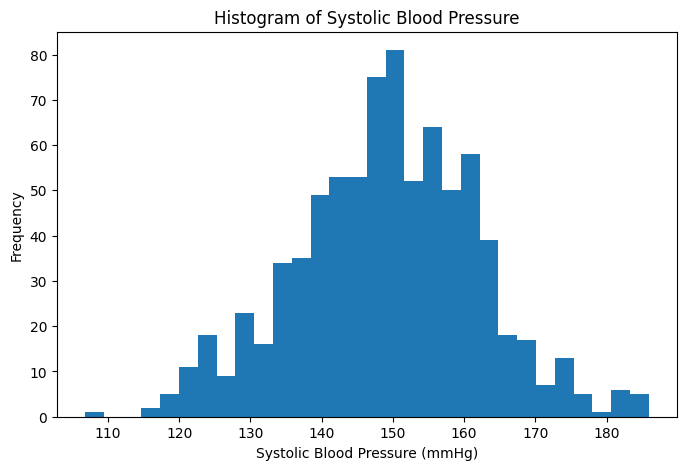

In [35]:
plt.figure(figsize=(8, 5))
plt.hist(df["systolic_bp"], bins=30)
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.title("Histogram of Systolic Blood Pressure")
plt.show()

The boxplot shows differences in the median and spread of weight between females and males. One group exhibits a higher median weight and greater variability.\
Some outliers are visible, which is expected in anthropometric data.

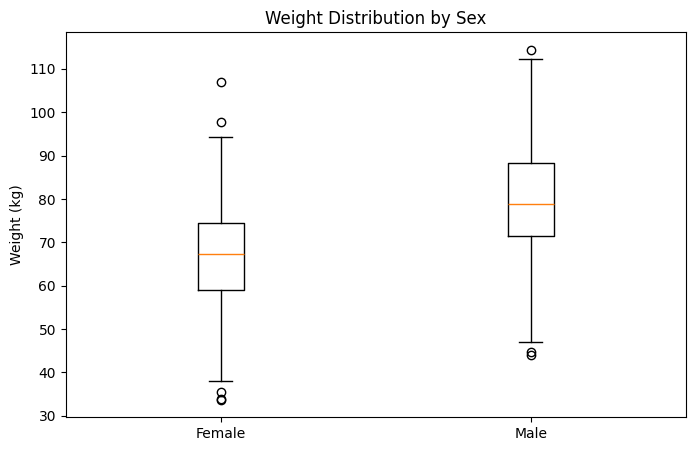

In [36]:
weights_female = df[df["sex"] == "F"]["weight"]
weights_male = df[df["sex"] == "M"]["weight"]

plt.figure(figsize=(8, 5))
plt.boxplot([weights_female, weights_male], tick_labels=["Female", "Male"])
plt.ylabel("Weight (kg)")
plt.title("Weight Distribution by Sex")
plt.show()

Most participants are non-smokers, with a smaller proportion reporting smoking.\
This imbalance is moderate and should be considered when comparing groups in later analyses.

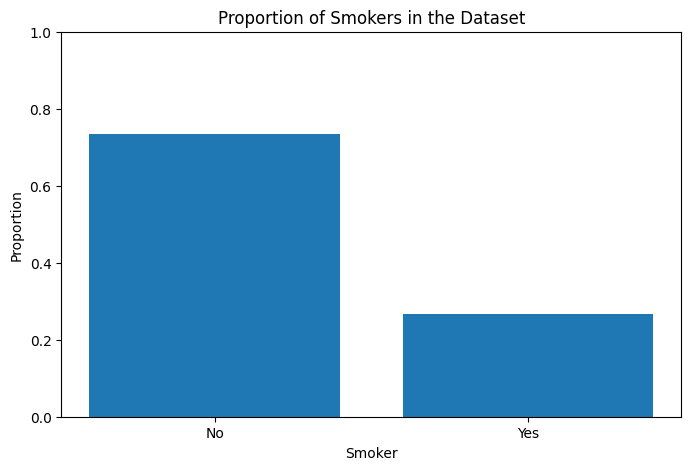

In [46]:
smoker_counts = df["smoker"].value_counts()
smoker_proportions = smoker_counts / len(df)

plt.figure(figsize=(8, 5))
plt.bar(smoker_proportions.index, smoker_proportions.values)
plt.ylabel("Proportion")
plt.xlabel("Smoker")
plt.title("Proportion of Smokers in the Dataset")
plt.ylim(0, 1)
plt.show()

In [47]:
observed_disease_rate = df["disease"].mean()
observed_disease_rate

print(f"Observed disease prevalence: {observed_disease_rate:.4f} ({observed_disease_rate:.2%})")
print(f"This corresponds to {df['disease'].sum()} out of {len(df)} participants.")



Observed disease prevalence: 0.0587 (5.88%)
This corresponds to 47 out of 800 participants.


Each simulated individual is assumed to have the same probability of disease as observed in the dataset. The simulation treats disease occurrence as a Bernoulli process and illustrates expected variation due to randomness.

In [14]:
n_simulated = 1000

simulated_disease = np.random.binomial(
    n=1,
    p=observed_disease_rate,
    size=n_simulated
)


In [22]:
simulated_disease_rate = simulated_disease.mean()
observed_disease_rate, simulated_disease_rate

print(f"Observed disease prevalence:  {observed_disease_rate:.2%}")
print(f"Simulated disease prevalence: {simulated_disease_rate:.2%} (n={n_simulated})")
print("Difference is expected due to random sampling variation.")



Observed disease prevalence:  5.88%
Simulated disease prevalence: 5.60% (n=1000)
Difference is expected due to random sampling variation.


To estimate a confidence interval for the mean systolic blood pressure, we use bootstrapping.\
This involves repeatedly resampling the observed blood pressure values with replacement and computing the mean for each resample.\
The array bootstrap_means represents an empirical sampling distribution of the mean systolic blood pressure, obtained via repeated resampling of the observed data.

In [48]:
bp = df["systolic_bp"].values
n = len(bp)

n_bootstrap = 10_000

bootstrap_means = np.empty(n_bootstrap)

for i in range(n_bootstrap):
    sample = np.random.choice(bp, size=n, replace=True)
    bootstrap_means[i] = sample.mean()


What range of values is plausible for the true population mean systolic blood pressure, given our data?

In [26]:
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)
ci_lower, ci_upper

bp_mean = df["systolic_bp"].mean()
print(f"Sample mean systolic BP: {bp_mean:.2f} mmHg")
print(f"95% bootstrap CI for mean systolic BP: Lower: {ci_lower:.2f}, Upper: {ci_upper:.2f} mmHg")


Sample mean systolic BP: 149.18 mmHg
95% bootstrap CI for mean systolic BP: Lower: 148.31, Upper: 150.07 mmHg


## Hypothesis Test: Systolic Blood Pressure and Smoking

In [51]:
bp_smokers = df[df["smoker"] == "Yes"]["systolic_bp"]
bp_nonsmokers = df[df["smoker"] == "No"]["systolic_bp"]

t_stat, p_value_two_sided = stats.ttest_ind(
    bp_smokers,
    bp_nonsmokers,
    equal_var=False
)

# One-sided p-value (directional check)
if t_stat > 0:
    p_value_one_sided = p_value_two_sided / 2
else:
    p_value_one_sided = 1 - (p_value_two_sided / 2)

t_stat, p_value_one_sided

mean_smokers = bp_smokers.mean()
mean_nonsmokers = bp_nonsmokers.mean()
diff = mean_smokers - mean_nonsmokers

print(f"Mean systolic BP (smokers):      {mean_smokers:.2f} mmHg (n={len(bp_smokers)})")
print(f"Mean systolic BP (non-smokers):  {mean_nonsmokers:.2f} mmHg (n={len(bp_nonsmokers)})")
print(f"Difference (smokers - non):      {diff:.2f} mmHg")

print(f"Welch t-statistic: {t_stat:.3f}")
print(f"One-sided p-value (H1: smokers > non-smokers): {p_value_one_sided:.4f}")

alpha = 0.05
decision = "REJECT H0" if p_value_one_sided < alpha else "FAIL TO REJECT H0"
print(f"Decision at α={alpha}: {decision}")


Mean systolic BP (smokers):      149.52 mmHg (n=213)
Mean systolic BP (non-smokers):  149.05 mmHg (n=587)
Difference (smokers - non):      0.47 mmHg
Welch t-statistic: 0.450
One-sided p-value (H1: smokers > non-smokers): 0.3264
Decision at α=0.05: FAIL TO REJECT H0


## Summary of Findings
Data quality:
The dataset contains 800 participants and no missing values. Categorical variables (sex, smoker, disease) contain only expected categories, so no cleaning was required.

Descriptive statistics:\
Key health variables (age, height, weight, systolic BP, cholesterol) fall within plausible ranges for an adult population.

Visual exploration:
- Systolic blood pressure appears approximately unimodal in distribution.
- Weight differs in central tendency and spread by sex.
- Most participants are non-smokers (moderate class imbalance).

Simulation:\
The observed disease prevalence was used as a probability parameter to simulate 1000 individuals; the simulated prevalence was close to the observed value, with expected random variation.

Confidence interval:\
A 95% bootstrap confidence interval was computed for the mean systolic blood pressure, providing a plausible range for the population mean.

Hypothesis test:\
A one-sided Welch two-sample t-test was used to test whether smokers have higher mean systolic blood pressure than non-smokers. The conclusion is based on the p-value compared to α = 0.05. (No causal interpretation is made.)